In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Import citypy
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities =[]

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

608

In [6]:
# Import your Requests Library and the weather_api_key.
import requests
from config import weather_api_key


In [7]:
# Build the basic URL for the OpenWeatherMap with api key for access.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a72fe0cbaab6663ac9bc09242e81fe75


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes.
    if(i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
            
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add one to the record count
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 2 of Set 1 | shaumiani
Processing Record 3 of Set 1 | labrea
Processing Record 4 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 5 of Set 1 | kahului
Processing Record 6 of Set 1 | mehamn
Processing Record 7 of Set 1 | barrow
Processing Record 8 of Set 1 | sao filipe
Processing Record 9 of Set 1 | mar del plata
Processing Record 10 of Set 1 | beloha
Processing Record 11 of Set 1 | clearwater
Processing Record 12 of Set 1 | ca mau
Processing Record 13 of Set 1 | halifax
Processing Record 14 of Set 1 | north battleford
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | victor harbor
Processing Record 20 of Set 1 | monze
Processing Record 21 of Set 1 | mahebourg
Processing Record 

City not found. Skipping...
Processing Record 41 of Set 4 | zeya
Processing Record 42 of Set 4 | saint george
Processing Record 43 of Set 4 | pucallpa
Processing Record 44 of Set 4 | shahrud
Processing Record 45 of Set 4 | la mesa
Processing Record 46 of Set 4 | san patricio
Processing Record 47 of Set 4 | camapua
Processing Record 48 of Set 4 | barreirinhas
Processing Record 49 of Set 4 | qasigiannguit
Processing Record 50 of Set 4 | saint-pierre
Processing Record 1 of Set 5 | diapaga
Processing Record 2 of Set 5 | cidreira
Processing Record 3 of Set 5 | vila velha
Processing Record 4 of Set 5 | aksu
Processing Record 5 of Set 5 | abu dhabi
Processing Record 6 of Set 5 | bima
Processing Record 7 of Set 5 | georgetown
Processing Record 8 of Set 5 | evensk
Processing Record 9 of Set 5 | kihei
Processing Record 10 of Set 5 | beisfjord
Processing Record 11 of Set 5 | mossendjo
Processing Record 12 of Set 5 | sao felix do xingu
Processing Record 13 of Set 5 | yumen
Processing Record 14 of 

Processing Record 30 of Set 8 | nikolskoye
Processing Record 31 of Set 8 | san quintin
Processing Record 32 of Set 8 | fairbanks
Processing Record 33 of Set 8 | bambous virieux
Processing Record 34 of Set 8 | ranong
Processing Record 35 of Set 8 | tabou
Processing Record 36 of Set 8 | khani
Processing Record 37 of Set 8 | gweta
Processing Record 38 of Set 8 | los llanos de aridane
Processing Record 39 of Set 8 | turan
Processing Record 40 of Set 8 | bluefields
Processing Record 41 of Set 8 | rio gallegos
Processing Record 42 of Set 8 | baykit
Processing Record 43 of Set 8 | neryungri
Processing Record 44 of Set 8 | pontianak
Processing Record 45 of Set 8 | cabedelo
Processing Record 46 of Set 8 | broken hill
Processing Record 47 of Set 8 | honiara
Processing Record 48 of Set 8 | general pico
Processing Record 49 of Set 8 | fukue
Processing Record 50 of Set 8 | ciudad bolivar
Processing Record 1 of Set 9 | nataga
Processing Record 2 of Set 9 | anaconda
Processing Record 3 of Set 9 | gra

Processing Record 18 of Set 12 | emba
Processing Record 19 of Set 12 | sungaipenuh
Processing Record 20 of Set 12 | manoel urbano
Processing Record 21 of Set 12 | sao paulo de olivenca
Processing Record 22 of Set 12 | dombarovskiy
Processing Record 23 of Set 12 | muros
Processing Record 24 of Set 12 | razdolnaya
Processing Record 25 of Set 12 | lucapa
Processing Record 26 of Set 12 | skala
Processing Record 27 of Set 12 | richards bay
Processing Record 28 of Set 12 | omboue
Processing Record 29 of Set 12 | san cristobal
Processing Record 30 of Set 12 | qui nhon
Processing Record 31 of Set 12 | cabinda
Processing Record 32 of Set 12 | lynchburg
Processing Record 33 of Set 12 | aitape
Processing Record 34 of Set 12 | aflu
City not found. Skipping...
Processing Record 35 of Set 12 | komsomolskiy
Processing Record 36 of Set 12 | novikovo
Processing Record 37 of Set 12 | lulea
Processing Record 38 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 39 of Set 12 | comodor

In [10]:
len(city_data)

562

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Shaumiani,41.3527,44.7618,44.42,65,11,1.10,GE,2022-03-25 16:19:30
1,Labrea,-7.2586,-64.7981,82.63,84,74,3.18,BR,2022-03-25 16:19:30
2,Kahului,20.8947,-156.4700,73.42,68,0,11.50,US,2022-03-25 16:19:31
3,Mehamn,71.0357,27.8492,21.60,67,100,9.73,NO,2022-03-25 16:19:32
4,Barrow,71.2906,-156.7887,-2.18,78,100,19.57,US,2022-03-25 16:18:53


In [12]:
# Reorder the dataframe
city_data_df_new_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[city_data_df_new_order]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Shaumiani,GE,2022-03-25 16:19:30,41.3527,44.7618,44.42,65,11,1.10
1,Labrea,BR,2022-03-25 16:19:30,-7.2586,-64.7981,82.63,84,74,3.18
2,Kahului,US,2022-03-25 16:19:31,20.8947,-156.4700,73.42,68,0,11.50
3,Mehamn,NO,2022-03-25 16:19:32,71.0357,27.8492,21.60,67,100,9.73
4,Barrow,US,2022-03-25 16:18:53,71.2906,-156.7887,-2.18,78,100,19.57


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data_df into the CSV file created.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


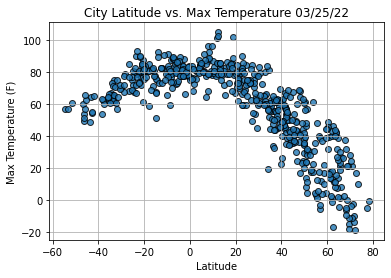

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

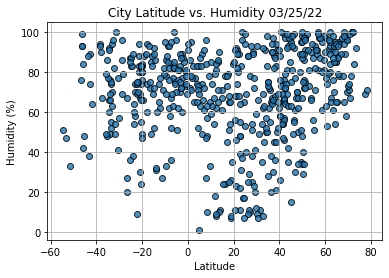

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

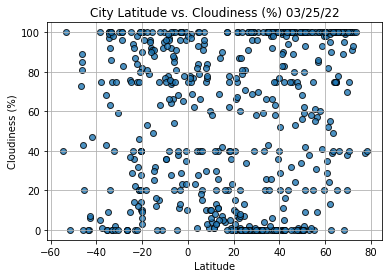

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

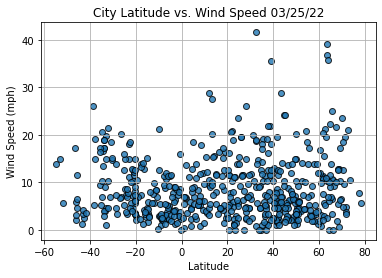

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [63]:
# Import linregress
from scipy import stats
from scipy.stats import linregress

In [64]:
# Create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()



In [65]:
index13 = city_data_df.loc[13]
index13

City                      Ushuaia
Country                        AR
Date          2022-03-25 16:19:34
Lat                         -54.8
Lng                         -68.3
Max Temp                    56.86
Humidity                       51
Cloudiness                     40
Wind Speed                   13.8
Name: 13, dtype: object

In [66]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4       True
       ...  
557     True
558     True
559     True
560     True
561     True
Name: Lat, Length: 562, dtype: bool

In [67]:
city_data_df.loc[(city_data_df["Lat"]) >= 0].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Shaumiani,GE,2022-03-25 16:19:30,41.3527,44.7618,44.42,65,11,1.10
2,Kahului,US,2022-03-25 16:19:31,20.8947,-156.4700,73.42,68,0,11.50
3,Mehamn,NO,2022-03-25 16:19:32,71.0357,27.8492,21.60,67,100,9.73
4,Barrow,US,2022-03-25 16:18:53,71.2906,-156.7887,-2.18,78,100,19.57
5,Sao Filipe,CV,2022-03-25 16:19:32,14.8961,-24.4956,71.94,71,7,11.68


In [68]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

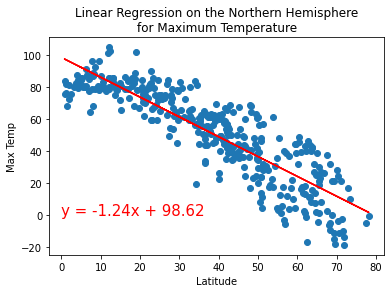

r: -0.875


In [82]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
res = stats.linregress(x_values, y_values)

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere\nfor Maximum Temperature",
                       "Max Temp",(0,0))
print(f"r: {res.rvalue:.3f}")

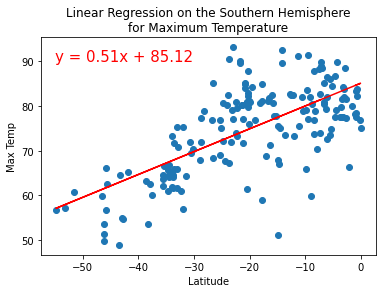

r: 0.682


In [83]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
res = stats.linregress(x_values, y_values)

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere\nfor Maximum Temperature",
                       "Max Temp",(-55,90))
print(f"r: {res.rvalue:.3f}")

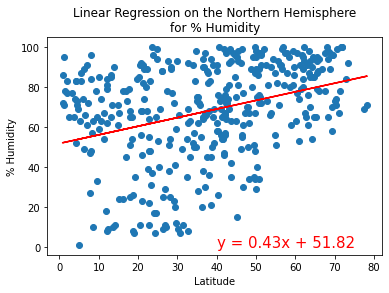

r: 0.343


In [84]:
# Humidity Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
res = stats.linregress(x_values, y_values)

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere\nfor % Humidity",
                       "% Humidity",(40,0))

print(f"r: {res.rvalue:.3f}")

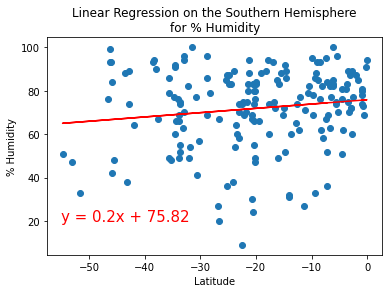

r: 0.144


In [85]:
# Humidity Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
res = stats.linregress(x_values, y_values)

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere\nfor % Humidity",
                       "% Humidity",(-55,20))
print(f"r: {res.rvalue:.3f}")

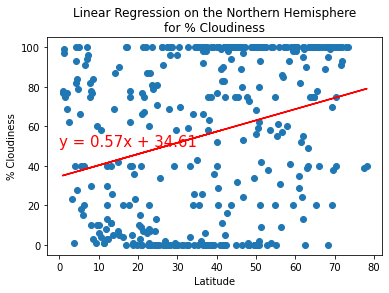

r: 0.274


In [86]:
# Cloudiness Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
res = stats.linregress(x_values, y_values)


# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere\nfor % Cloudiness",
                       "% Cloudiness",(0,50))
print(f"r: {res.rvalue:.3f}")

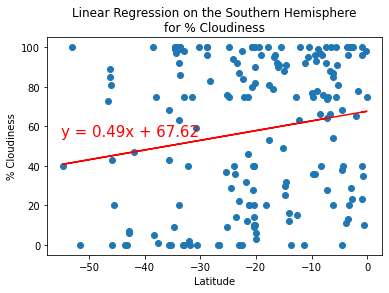

r: 0.175


In [87]:
# Cloudiness Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
res = stats.linregress(x_values, y_values)

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere\nfor % Cloudiness",
                       "% Cloudiness",(-55,55))
print(f"r: {res.rvalue:.3f}")

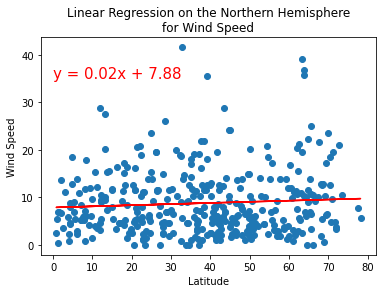

r: 0.068


In [88]:
# Wind Speed Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
res = stats.linregress(x_values, y_values)

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere\nfor Wind Speed",
                       "Wind Speed",(0,35))
print(f"r: {res.rvalue:.3f}")

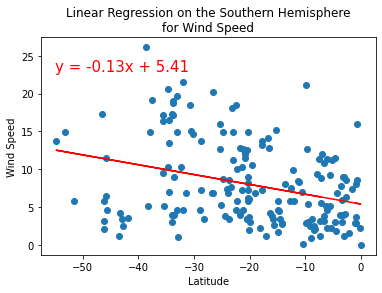

r: -0.316


In [89]:
# Wind Speed Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
res = stats.linregress(x_values, y_values)

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere\nfor Wind Speed",
                       "Wind Speed",(-55,23))
print(f"r: {res.rvalue:.3f}")